#### Importing Libraries

In [2]:
import qiskit as q
import qiskit.visualization as qv
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import GroverOperator

import matplotlib.style
import matplotlib as plt
plt.style.use("dark_background")

#### Defining our Quantum Circuit

In [56]:
n = q.QuantumRegister(1, name = "Data")
m = q.QuantumRegister(2, name = "Ext.")
qa = q.QuantumRegister(2, name = "Ancl.")
cl = q.ClassicalRegister(1, name = "M.")
circuit = QuantumCircuit(n, m, qa, cl)

#Initializing our information qubit
initial_state = np.array([np.sqrt(0.7),np.sqrt(0.3)])
circuit.initialize(initial_state,0) 
circuit.barrier()

#Encoding Circuit: a|0> + b|1> => a|000> + b|111>
circuit.cx(0,1); circuit.cx(0,2)  

#Bit Flip Error
circuit.barrier()
circuit.x(0)
circuit.barrier()

#Syndrom Circuit
circuit.cx(0,3); circuit.cx(1,3)
circuit.cx(1,4); circuit.cx(2,4)
circuit.barrier()

#Recovery Circuit
circuit.cx(3,0); circuit.cx(4,2)
circuit.ccx(4,3,0)
circuit.ccx(4,3,1)
circuit.ccx(4,3,2)
circuit.barrier()

#Decoding Circuit: a|000> + b|111> => a|0> + b|1> 
circuit.cx(0,2); circuit.cx(0,1)
circuit.barrier()

#Measurement
circuit.measure(0,0)
             
circuit.draw()


┌─────────────────────────────┐ ░            ░ ┌───┐ ░                »
   Data: ┤ Initialize(0.83666,0.54772) ├─░───■────■───░─┤ X ├─░───■────────────»
         └─────────────────────────────┘ ░ ┌─┴─┐  │   ░ └───┘ ░   │            »
 Ext._0: ────────────────────────────────░─┤ X ├──┼───░───────░───┼────■────■──»
                                         ░ └───┘┌─┴─┐ ░       ░   │    │    │  »
 Ext._1: ────────────────────────────────░──────┤ X ├─░───────░───┼────┼────┼──»
                                         ░      └───┘ ░       ░ ┌─┴─┐┌─┴─┐  │  »
Ancl._0: ────────────────────────────────░────────────░───────░─┤ X ├┤ X ├──┼──»
                                         ░            ░       ░ └───┘└───┘┌─┴─┐»
Ancl._1: ────────────────────────────────░────────────░───────░───────────┤ X ├»
                                         ░            ░       ░           └───┘»
   M.: 1/══════════════════════════════════════════════════════════════════════»
                                                                               »
«               ░ ┌───┐     ┌───┐           ░            ░ ┌─┐
«   Data: ──────░─┤ X ├─────┤ X ├───────────░───■────■───░─┤M├
«               ░ └─┬─┘     └─┬─┘┌───┐      ░   │  ┌─┴─┐ ░ └╥┘
« Ext._0: ──────░───┼─────────┼──┤ X ├──────░───┼──┤ X ├─░──╫─
«               ░   │  ┌───┐  │  └─┬─┘┌───┐ ░ ┌─┴─┐└───┘ ░  ║ 
« Ext._1: ──■───░───┼──┤ X ├──┼────┼──┤ X ├─░─┤ X ├──────░──╫─
«           │   ░   │  └─┬─┘  │    │  └─┬─┘ ░ └───┘      ░  ║ 
«Ancl._0: ──┼───░───■────┼────■────■────■───░────────────░──╫─
«         ┌─┴─┐ ░        │    │    │    │   ░            ░  ║ 
«Ancl._1: ┤ X ├─░────────■────■────■────■───░────────────░──╫─
«         └───┘ ░                           ░            ░  ║ 
«   M.: 1/══════════════════════════════════════════════════╩═
«                                                           0

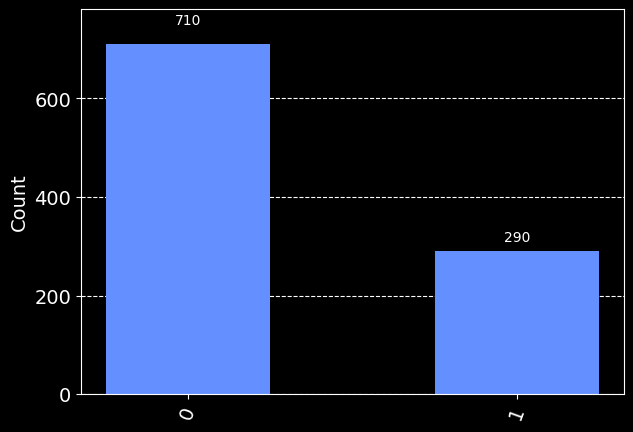

In [57]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1000
t_c = transpile(circuit, aer_sim)
results = aer_sim.run(t_c, shots=shots).result()
answer = results.get_counts()

qv.plot_histogram(answer)